In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

Считать в pandas.DataFrame любой источник данных: CSV, JSON, Excel-файл, HTML-таблицу и т.п.

In [3]:
df = pd.read_csv('../datasets/Raisin_Dataset.csv')
df_encoded = df.copy()
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


# Бинарная классификация:

Привести описание датасета.

Датасет содержит данные о различных характеристиках изюма. Каждая строка представляет собой отдельный образец изюма, а столбцы содержат различные измерения и свойства, которые помогают описать форму и структуру изюма

| Признак | Описание | Тип данных |
|---------|----------|------------|
| Area | Площадь изюма | Float |
| Perimeter | Периметр изюма | Float |
| MajorAxisLength | Длина главной оси изюма | Float |
| MinorAxisLength | Длина побочной оси изюма | Float |
| Eccentricity | Эксцентричность формы изюма | Float |
| ConvexArea | Выпуклая площадь изюма | Float |
| Extent | Отношение площади изюма к его ограничивающему прямоугольнику | Float |
| Class | Метка класса изюма | String |

Осуществить предобработку данных (избавиться от null, убрать некоторые признаки и т.п.) - "подчистить данные".

In [4]:
# Проверяем, что у выбранного датасета отсутсвуют null значения
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

Закодировать категориальные признаки при необходимости.

In [5]:
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


Выбрать какое-нибудь значение гиперпараметра 
k
 алгоритма 
k
N
N
. (Пусть k = 3)

Разбить выборку на обучающую и тестовую.

In [6]:
X = df.drop('Class', axis=1)
y = df['Class']
# Разбиение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Разбиение использовать одно и то же для всех последующих манипуляций.

Осуществить бинарную классификацию.

In [7]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


Посчитать метрики: 
a
c
c
u
r
a
c
y
, 
p
r
e
c
i
s
i
o
n
, 
r
e
c
a
l
l
, 
f-measure
, а также составить classification_report.

In [8]:
print("Без нормализации:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Без нормализации:
Accuracy: 0.8222222222222222
Precision: 0.849624060150376
Recall: 0.8014184397163121
F1-score: 0.8248175182481752

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       129
           1       0.85      0.80      0.82       141

    accuracy                           0.82       270
   macro avg       0.82      0.82      0.82       270
weighted avg       0.82      0.82      0.82       270



Нормализовать данные (StandardScalerили MinMaxScaler).

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Осуществить бинарную классификацию.

In [10]:
knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)

Посчитать метрики: 
a
c
c
u
r
a
c
y
, 
p
r
e
c
i
s
i
o
n
, 
r
e
c
a
l
l
, 
f-measure
, а также составить classification_report.

In [11]:
print("\nС нормализацией (StandardScaler):")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("Precision:", precision_score(y_test, y_pred_scaled))
print("Recall:", recall_score(y_test, y_pred_scaled))
print("F1-score:", f1_score(y_test, y_pred_scaled))
print("\nClassification Report:\n", classification_report(y_test, y_pred_scaled))


С нормализацией (StandardScaler):
Accuracy: 0.825925925925926
Precision: 0.8455882352941176
Recall: 0.8156028368794326
F1-score: 0.8303249097472925

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.82       129
           1       0.85      0.82      0.83       141

    accuracy                           0.83       270
   macro avg       0.83      0.83      0.83       270
weighted avg       0.83      0.83      0.83       270



Сравнить метрики на данных без нормализации и с применением нормализации.

- Анализ результатов:
    1. Accuracy (Точность модели):
        * Незначительно улучшилась (+0.37%) после нормализации.
        * Это говорит о том, что масштабирование признаков помогло модели лучше обобщать данные.
    2. Precision (Точность для класса 1):
        * Слегка снизилась (-0.40%), что означает небольшой рост ложноположительных прогнозов.
        * Возможно, нормализация сделала некоторые "пограничные" случаи менее четкими.
    3. Recall (Полнота для класса 1):
        * Увеличился на 1.42%, что указывает на лучшее распознавание положительных классов.
        * Нормализация помогла уменьшить количество ложноотрицательных прогнозов.
    3. F1-score (Гармоническое среднее):
        * Рост на 0.55% подтверждает, что баланс между точностью и полнотой улучшился.
- Вывод -- Нормализация дала небольшой, но статистически значимый прирост качества модели, особенно в части полноты (Recall).

Построить сorrelation heatmap и/или воспользоваться методом corr(). Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений.

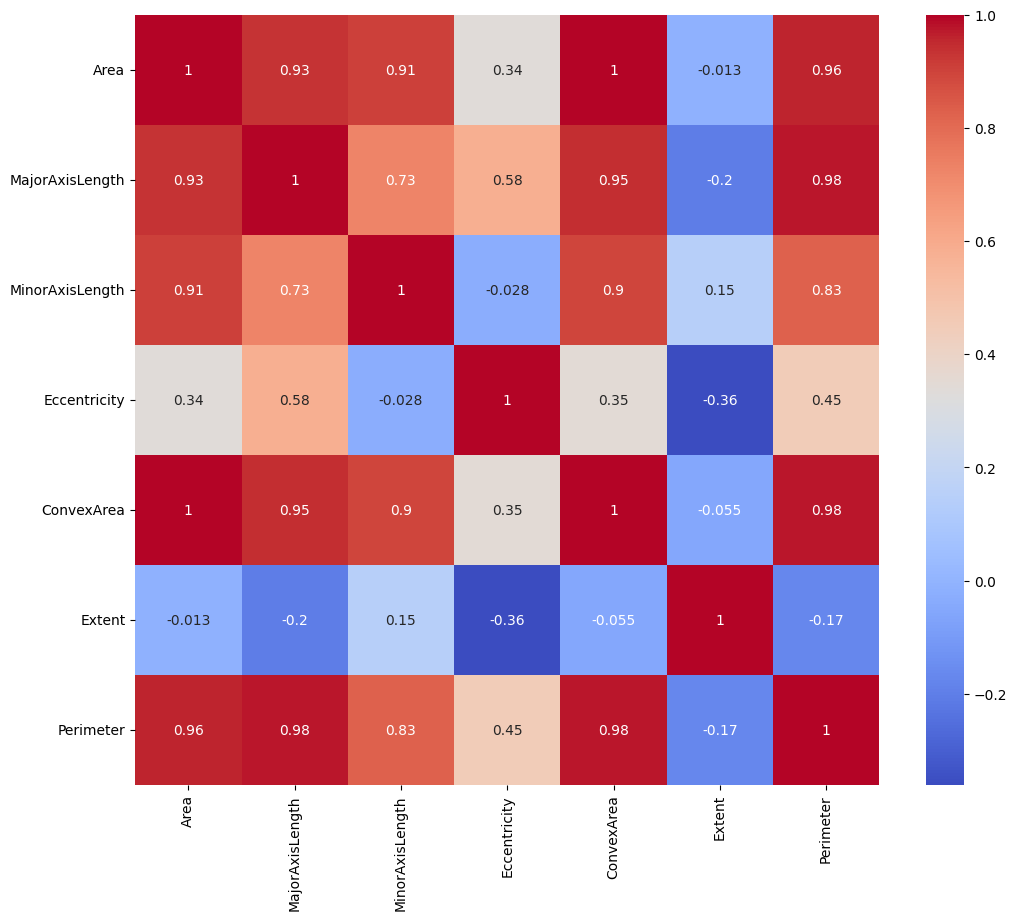

In [12]:
# Разделяем признаки и целевую переменную (как вы делали раньше)
X = df_encoded.drop('Class', axis=1)
y = df_encoded['Class']
corr_matrix = X.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [13]:
# Метод фильтрации признаков из примечания
def feature_selection(corr_matrix, threshold=0.5):
    corr_matrix = corr_matrix.copy()
    np.fill_diagonal(corr_matrix.values, 0)
    filtered = corr_matrix.abs().gt(threshold)
    feature_importance = filtered.sum()
    sorted_features = feature_importance.sort_values(ascending=False)
    return sorted_features[sorted_features > 0]

selected_features = feature_selection(corr_matrix)

# Выбор признаков
X_selected = X[selected_features.index]
X_train_selected, X_test_selected = X_train[selected_features.index], X_test[selected_features.index]

# Нормализация выбранных признаков
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)


Осуществить бинарную классификацию с отфильтрованными признаками.

In [14]:
knn.fit(X_train_selected_scaled, y_train)
y_pred_selected = knn.predict(X_test_selected_scaled)

Посчитать метрики: 
a
c
c
u
r
a
c
y
, 
p
r
e
c
i
s
i
o
n
, 
r
e
c
a
l
l
, 
f-measure
, а также составить classification_report.

In [15]:
print("\nС отобранными признаками:")
print("Accuracy:", accuracy_score(y_test, y_pred_selected))
print("Precision:", precision_score(y_test, y_pred_selected))
print("Recall:", recall_score(y_test, y_pred_selected))
print("F1-score:", f1_score(y_test, y_pred_selected))
print("\nClassification Report:\n", classification_report(y_test, y_pred_selected))


С отобранными признаками:
Accuracy: 0.8296296296296296
Precision: 0.8571428571428571
Recall: 0.8085106382978723
F1-score: 0.8321167883211679

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       129
           1       0.86      0.81      0.83       141

    accuracy                           0.83       270
   macro avg       0.83      0.83      0.83       270
weighted avg       0.83      0.83      0.83       270



Сравнить результаты "до" и "после" фильтрации, сделать выводы.

1. Accuracy (Общая точность):
    - Увеличилась на 0.37%, что свидетельствует о небольшом улучшении общей предсказательной способности модели после отбора признаков.
2. Precision (Точность для класса 1):
    - Улучшилась на 1.15%, что означает снижение доли ложноположительных срабатываний (модель стала лучше предсказывать положительный класс).
3. Recall (Полнота для класса 1):
    - Незначительно снизился (-0.71%), что говорит о небольшом увеличении ложноотрицательных прогнозов.
4. F1-score (Баланс точности и полноты):
    - Улучшился на 0.18%, что подтверждает, что модель стала немного более сбалансированной.
- Вывод - отбор признаков привел к улучшению точности (Precision) и общей accuracy, но незначительно снизил полноту (Recall). Это типично для ситуаций, когда удаляются шумовые или избыточные признаки, но часть полезной информации может быть потеряна.

Перебрать значения гиперпараметра 
k
 в каком-нибудь диапазоне с использованием кросс-валидации на данных с отфильтрованными признаками. Построить график train/test accuracy в зависимости от значения 
k
.

Лучшее значение k: 65


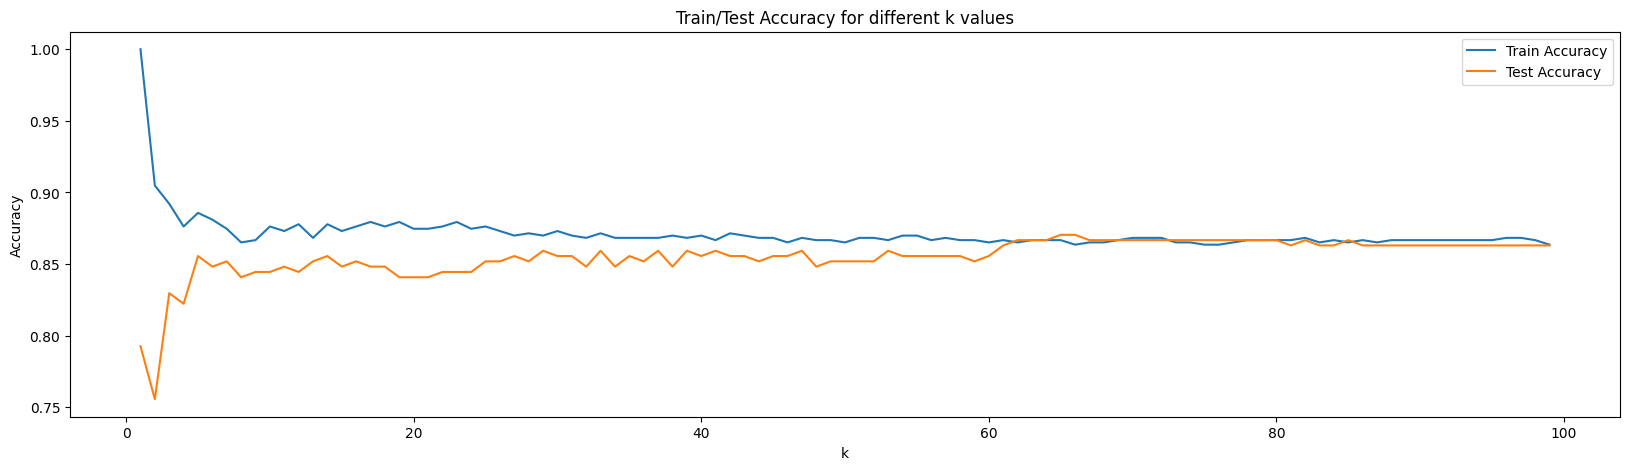

In [16]:
k_values = range(1, 100)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_selected_scaled, y_train)
    train_scores.append(knn.score(X_train_selected_scaled, y_train))
    test_scores.append(knn.score(X_test_selected_scaled, y_test))
best_k = k_values[np.argmax(test_scores)]
print("Лучшее значение k:", best_k)

plt.figure(figsize=(20, 5))
plt.plot(k_values, train_scores, label='Train Accuracy')
plt.plot(k_values, test_scores, label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Train/Test Accuracy for different k values')
plt.legend()
plt.show()

In [17]:
knn = KNeighborsClassifier(n_neighbors=65)
knn.fit(X_train_selected_scaled, y_train)
y_pred_selected = knn.predict(X_test_selected_scaled)

In [18]:
print("\nС лучшим значением k:")
print("Accuracy:", accuracy_score(y_test, y_pred_selected))
print("Precision:", precision_score(y_test, y_pred_selected))
print("Recall:", recall_score(y_test, y_pred_selected))
print("F1-score:", f1_score(y_test, y_pred_selected))
print("\nClassification Report:\n", classification_report(y_test, y_pred_selected))


С лучшим значением k:
Accuracy: 0.8703703703703703
Precision: 0.8680555555555556
Recall: 0.8865248226950354
F1-score: 0.8771929824561403

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86       129
           1       0.87      0.89      0.88       141

    accuracy                           0.87       270
   macro avg       0.87      0.87      0.87       270
weighted avg       0.87      0.87      0.87       270



# Многоклассовая классификация

In [19]:
df = pd.read_csv('../datasets/Score.csv')
df_decoded = df.copy()
df

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.0,7.0,4.0,26.822620,265.0,No,80.415295,312.494089,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
1,3.0,7.0,4.0,31.944960,265.0,No,118.280222,284.629162,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
2,3.0,7.0,4.0,28.609352,267.0,No,81.699521,331.209863,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
3,5.0,4.0,4.0,31.377862,268.0,No,199.458074,223.451310,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
4,6.0,4.0,4.0,24.797347,269.0,No,41.420153,341.489231,Good,Good,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87949,23.0,7.0,3.0,34.663572,378.0,No,60.971333,479.866228,Poor,Good,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023
87950,18.0,7.0,3.0,40.565631,379.0,No,54.185950,496.651610,Poor,Good,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023
87951,27.0,6.0,3.0,41.255522,380.0,No,24.028477,516.809083,Poor,Good,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023
87952,20.0,6.0,3.0,33.638208,381.0,No,251.672582,319.164979,Standard,Good,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023


Привести описание датасета

Данный датасет содержит информацию о кредитной истории и финансовом поведении клиентов. Он включает в себя различные признаки, связанные с кредитными платежами, задолженностями, кредитным рейтингом и демографическими данными.
| Признак | Описание | Тип данных |
|---------|----------|------------|
| Delay_from_due_date |	Количество дней задержки платежа от установленного срока | float |
| Num_of_Delayed_Payment | Общее количество просроченных платежей у клиента | float |
| Num_Credit_Inquiries | Количество запросов в кредитную историю за последний период | float |
| Credit_Utilization_Ratio | Процент использования доступного кредитного лимита | float |
| Credit_History_Age | Возраст кредитной истории в месяцах | float |
| Payment_of_Min_Amount | Привычка клиента оплачивать только минимальный платёж | Категориальный |
| Amount_invested_monthly | Сумма, которую клиент регулярно инвестирует | float |
| Monthly_Balance | Среднемесячный остаток средств на счетах | float |
| Credit_Score | Кредитный рейтинг | Категориальный |
| Credit_Mix | Тип кредитного портфеля | Категориальный |
| Payment_Behaviour | Шаблон поведения при платежах | Категориальный |
| Age | Возраст клиента | float |
| Annual_Income | Годовой доход в денежных единицах | float |
| Num_Bank_Accounts | Количество открытых банковских счетов | float |
| Num_Credit_Card | Количество имеющихся кредитных карт | float |
| Interest_Rate | Процентная ставка по основному кредиту | float |
| Num_of_Loan | Количество активных кредитов | float |
| Monthly_Inhand_Salary | Чистая ежемесячная зарплата | float |
| Changed_Credit_Limit | Изменение кредитного лимита за последний период | float |
| Outstanding_Debt | Текущая сумма непогашенного долга | float |
| Total_EMI_per_month | Общая сумма ежемесячных платежей по кредитам | float |

Осуществить предобработку данных - "подчистить данные".

In [20]:
# Проверяем, что у выбранного датасета отсутсвуют null значения
df.isnull().sum()

Delay_from_due_date         0
Num_of_Delayed_Payment      0
Num_Credit_Inquiries        0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Amount_invested_monthly     0
Monthly_Balance             0
Credit_Score                0
Credit_Mix                  0
Payment_Behaviour           0
Age                         0
Annual_Income               0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Monthly_Inhand_Salary       0
Changed_Credit_Limit        0
Outstanding_Debt            0
Total_EMI_per_month         0
dtype: int64

Закодировать категориальные признаки при необходимости.

In [21]:
le = LabelEncoder()
categorical_cols = ['Payment_of_Min_Amount', 'Credit_Mix', 'Payment_Behaviour', 'Credit_Score']
for col in categorical_cols:
    if col != 'Credit_Score':
        df[col] = le.fit_transform(df[col])
    df_decoded[col] = le.fit_transform(df[col])
df_decoded

,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_Mix,...,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Monthly_Inhand_Salary,Changed_Credit_Limit,Outstanding_Debt,Total_EMI_per_month
0,3.0,7.0,4.0,26.822620,265.0,0,80.415295,312.494089,0,1,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
1,3.0,7.0,4.0,31.944960,265.0,0,118.280222,284.629162,0,1,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
2,3.0,7.0,4.0,28.609352,267.0,0,81.699521,331.209863,0,1,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
3,5.0,4.0,4.0,31.377862,268.0,0,199.458074,223.451310,0,1,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
4,6.0,4.0,4.0,24.797347,269.0,0,41.420153,341.489231,0,1,...,23.0,19114.12,3.0,4.0,3.0,4.0,1824.843333,11.27,809.98,49.574949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87949,23.0,7.0,3.0,34.663572,378.0,0,60.971333,479.866228,1,1,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023
87950,18.0,7.0,3.0,40.565631,379.0,0,54.185950,496.651610,1,1,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023
87951,27.0,6.0,3.0,41.255522,380.0,0,24.028477,516.809083,1,1,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023
87952,20.0,6.0,3.0,33.638208,381.0,0,251.672582,319.164979,2,1,...,25.0,39628.99,4.0,6.0,7.0,2.0,3359.415833,11.50,502.38,35.104023


Разбить выборку на обучающую и тестовую. Нормализовать данные.

In [22]:
X = df.drop('Credit_Score', axis=1)
y = df['Credit_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Выбрать какое-нибудь значение гиперпараметра 
k
 алгоритма 
k
N
N
. (k = 4)

Осуществить многоклассовую классификацию.

In [23]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

Посчитать метрики: 
a
c
c
u
r
a
c
y
, 
p
r
e
c
i
s
i
o
n
, 
r
e
c
a
l
l
, 
f-measure
, а также составить classification_report.

In [24]:

print("\nМногоклассовая классификация (все признаки):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Многоклассовая классификация (все признаки):
Accuracy: 0.7508621669761625

Classification Report:
               precision    recall  f1-score   support

        Good       0.64      0.75      0.69      4656
        Poor       0.72      0.83      0.77      7638
    Standard       0.83      0.71      0.76     14093

    accuracy                           0.75     26387
   macro avg       0.73      0.76      0.74     26387
weighted avg       0.76      0.75      0.75     26387



Построить сorrelation heatmap и/или воспользоваться методом corr(). Выбрать наиболее важные признаки эвристически или на основании каких-нибудь вычислений (см. примечание).

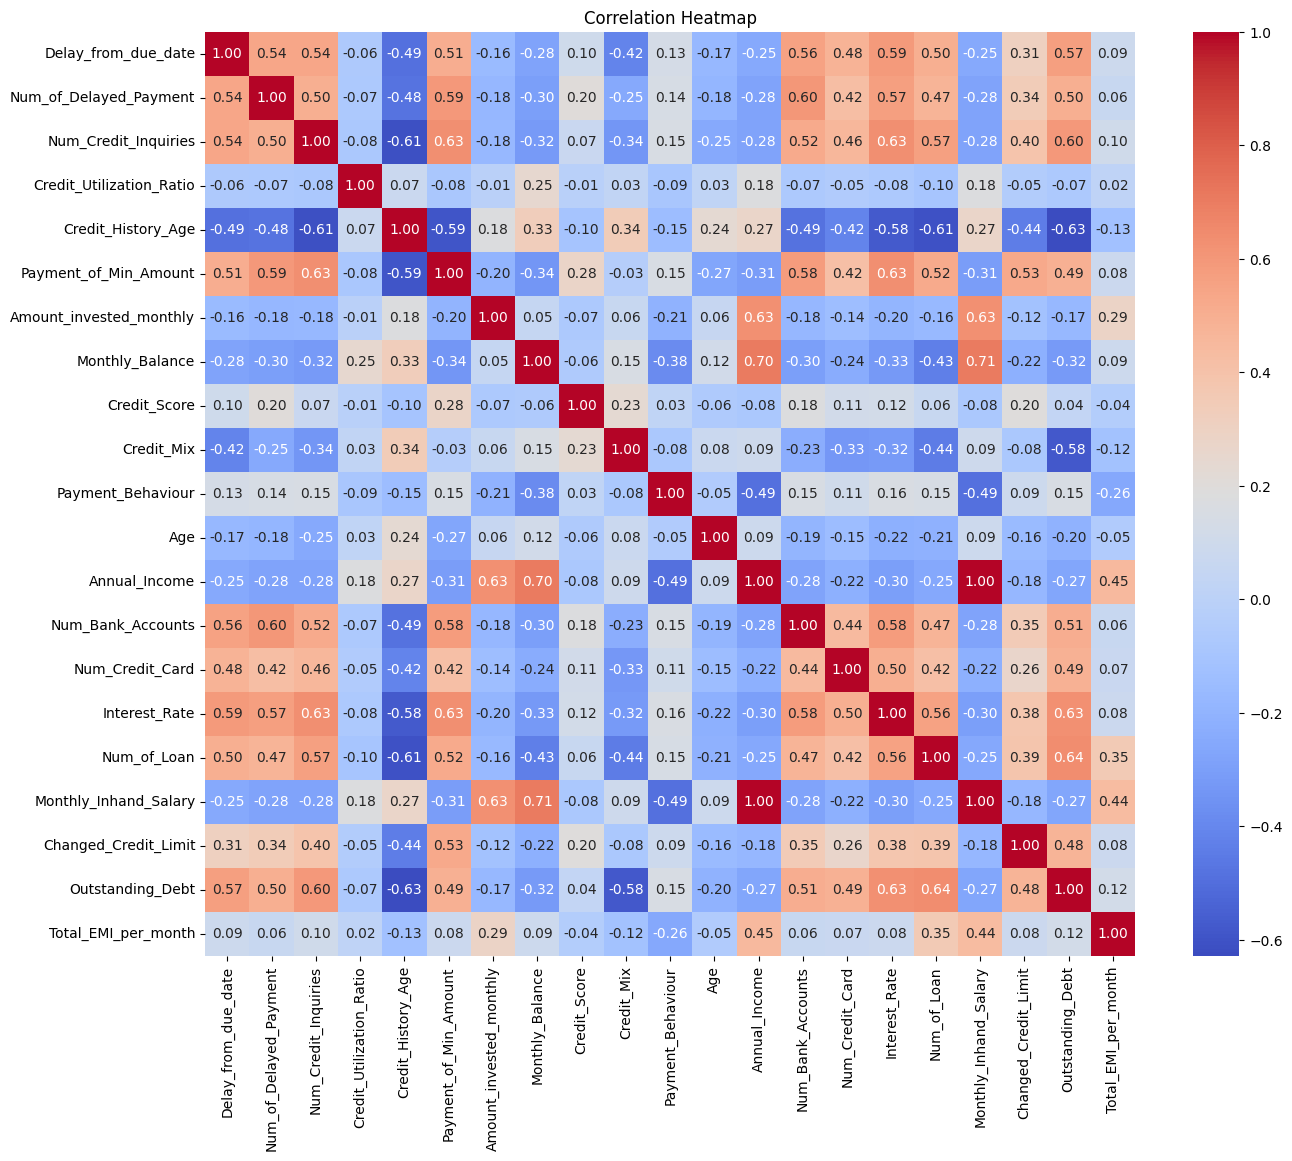

In [25]:
plt.figure(figsize=(15, 12))
corr_matrix = df_decoded.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [26]:
def feature_selection(corr_matrix, target_col):
    corr_with_target = corr_matrix[target_col].abs().sort_values(ascending=False)
    important_features = corr_with_target[corr_with_target > 0.1].index.tolist()
    if target_col in important_features:
        important_features.remove(target_col)
    return important_features

# Выбираем признаки, коррелирующие с Credit_Score (он уже закодирован)
important_features = feature_selection(corr_matrix, 'Credit_Score')
print("Важные признаки:", important_features)

Важные признаки: ['Payment_of_Min_Amount', 'Credit_Mix', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Bank_Accounts', 'Interest_Rate', 'Num_Credit_Card', 'Credit_History_Age']


Осуществить многоклассовую классификацию с отфильтрованными признаками.

In [27]:
X_selected = X[important_features]
X_train_selected, X_test_selected = X_train[important_features], X_test[important_features]

X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

knn.fit(X_train_selected_scaled, y_train)
y_pred_selected = knn.predict(X_test_selected_scaled)

Посчитать метрики: 
a
c
c
u
r
a
c
y
, 
p
r
e
c
i
s
i
o
n
, 
r
e
c
a
l
l
, 
f-measure
, а также составить classification_report.

In [28]:
print("\nМногоклассовая классификация (отобранные признаки):")
print("Accuracy:", accuracy_score(y_test, y_pred_selected))
print("\nClassification Report:\n", classification_report(y_test, y_pred_selected))


Многоклассовая классификация (отобранные признаки):
Accuracy: 0.7659832493273203

Classification Report:
               precision    recall  f1-score   support

        Good       0.67      0.80      0.73      4656
        Poor       0.72      0.86      0.78      7638
    Standard       0.85      0.71      0.77     14093

    accuracy                           0.77     26387
   macro avg       0.75      0.79      0.76     26387
weighted avg       0.78      0.77      0.77     26387



Сравнить результаты "до" и "после" фильтрации, сделать выводы.

- Анализ изменений:
    1. Общая точность (Accuracy):
        - Увеличилась на 1.51%, что является значимым улучшением для модели.
    2. Класс Good:
        - Наибольший прирост по всем метрикам:
            * Precision +3%
            * Recall +5%э
            * F1-score +4%
        - Модель стала лучше определять "хорошие" случаи.
    3. Класс Poor:
        - Recall увеличился на 3% при сохранении Precision.
        - Модель реже пропускает "плохие" случаи.
    4. Класс Standard:
        - Незначительное улучшение Precision (+2%) при стабильном Recall.
        - Модель стала точнее классифицировать "стандартные" случаи.
- Вывод - фильтрация признаков улучшила все ключевые метрики модели, наибольший выигрыш получен для класса Good (+3-5% по метрикам).

Перебрать значения гиперпараметра 
k
 в каком-нибудь диапазоне с использованием кросс-валидации на данных с отфильтрованными признаками. Построить график train/test accuracy в зависимости от значения 
k
.

Лучшее значение k: 2


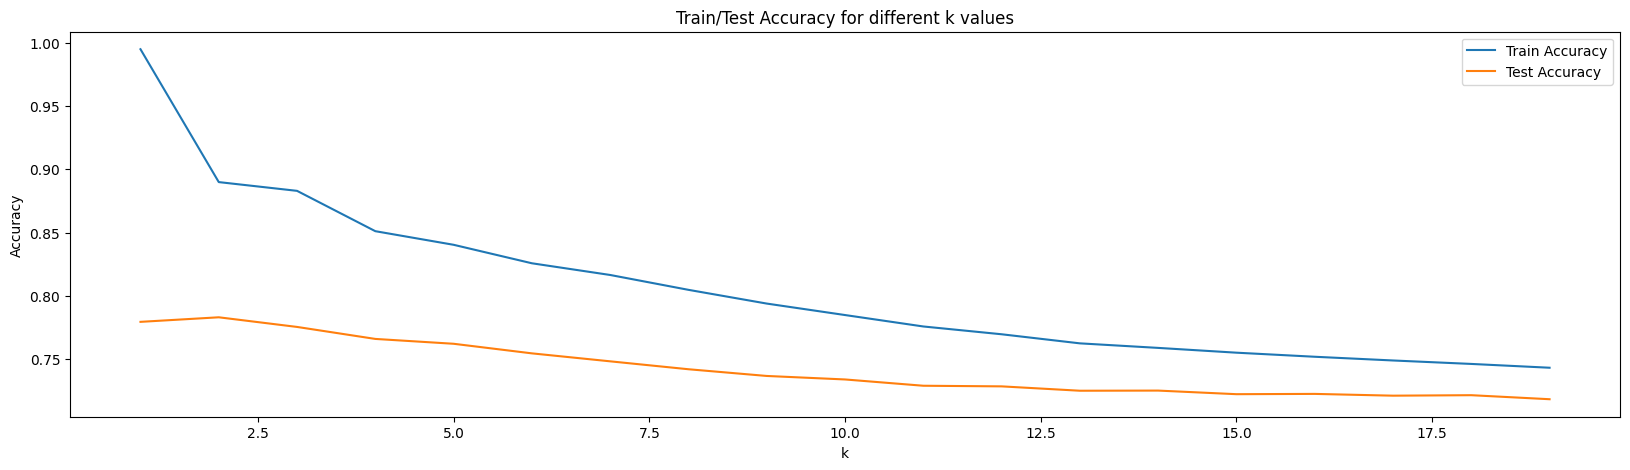

In [32]:
k_values = range(1, 20)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_selected_scaled, y_train)
    train_scores.append(knn.score(X_train_selected_scaled, y_train))
    test_scores.append(knn.score(X_test_selected_scaled, y_test))
best_k = k_values[np.argmax(test_scores)]
print("Лучшее значение k:", best_k)

plt.figure(figsize=(20, 5))
plt.plot(k_values, train_scores, label='Train Accuracy')
plt.plot(k_values, test_scores, label='Test Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Train/Test Accuracy for different k values')
plt.legend()
plt.show()

Для лучшего классификатора привести метрики, classification_report

In [30]:
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train_selected_scaled, y_train)
y_pred_best = best_knn.predict(X_test_selected_scaled)

print("\nС лучшим значением k:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))


С лучшим значением k:
Accuracy: 0.7830749990525637

Classification Report:
               precision    recall  f1-score   support

        Good       0.67      0.88      0.76      4656
        Poor       0.73      0.90      0.80      7638
    Standard       0.89      0.69      0.78     14093

    accuracy                           0.78     26387
   macro avg       0.76      0.82      0.78     26387
weighted avg       0.81      0.78      0.78     26387



построить confusion matrix (это вроде матрицы 
T
N
 / 
T
P
 / 
F
N
 / 
F
P
, только расширенной для многоклассовой классификации, чтобы понять, в какие стороны чаще ошибается классификатор).

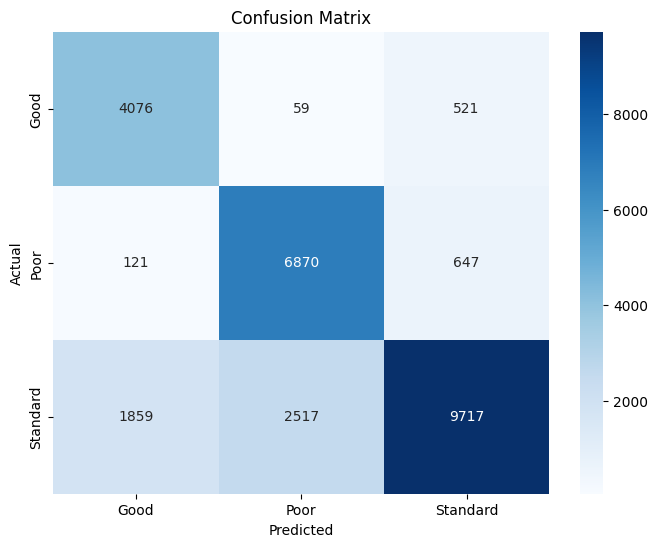

In [31]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=best_knn.classes_, yticklabels=best_knn.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()